# ARIMA Model Used for Comparing with LSTM

In [1]:
from sklearn.metrics import *


In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Preprocessing and Feature Building 

In [3]:
#Importing modules
import pandas as pd
import os

from pandas import read_csv

dataset = pd.read_csv("SalesData.csv")
dataset['date'] = pd.to_datetime(dataset['date'])

# Print head
dataset.head()

,date,Month,Day,calender day,Day_C,Year,item,TotalSales10
0,2013-01-01,1,1,Tuesday,2,2013,1,133
1,2013-01-02,1,2,Wednesday,3,2013,1,99
2,2013-01-03,1,3,Thursday,4,2013,1,127
3,2013-01-04,1,4,Friday,5,2013,1,145
4,2013-01-05,1,5,Saturday,6,2013,1,149


In [4]:
print (dataset.columns.tolist())

['date', 'Month', 'Day', 'calender day', 'Day_C', 'Year ', 'item', 'TotalSales10']


In [5]:
# Print out the first rows of papers
dataset.head()
dataset.tail()

,date,Month,Day,calender day,Day_C,Year,item,TotalSales10
9125,2017-12-27,12,27,Wednesday,3,2017,5,148
9126,2017-12-28,12,28,Thursday,4,2017,5,157
9127,2017-12-29,12,29,Friday,5,2017,5,177
9128,2017-12-30,12,30,Saturday,6,2017,5,173
9129,2017-12-31,12,31,Sunday,7,2017,5,188


In [6]:
item_1 = dataset.loc[dataset['item'] == 1]

In [7]:
item_1['date'].min(), item_1['date'].max()
#item_1.head


(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [8]:
item_1 = item_1.sort_values('date')
item_1 = item_1.groupby('date')['TotalSales10'].sum().reset_index()

In [9]:
item_1 = item_1.set_index(['date'])
#item_1.index
item_1.index = pd.to_datetime(item_1.index)

In [10]:
item_1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=1826, freq=None)

In [11]:
y = item_1['TotalSales10'].resample('MS').mean()

In [12]:
y['2017':]

date
2017-01-01    168.903226
2017-02-01    189.250000
2017-03-01    217.548387
2017-04-01    264.233333
2017-05-01    276.161290
2017-06-01    297.666667
2017-07-01    321.290323
2017-08-01    275.741935
2017-09-01    261.433333
2017-10-01    245.806452
2017-11-01    255.866667
2017-12-01    187.387097
Freq: MS, Name: TotalSales10, dtype: float64

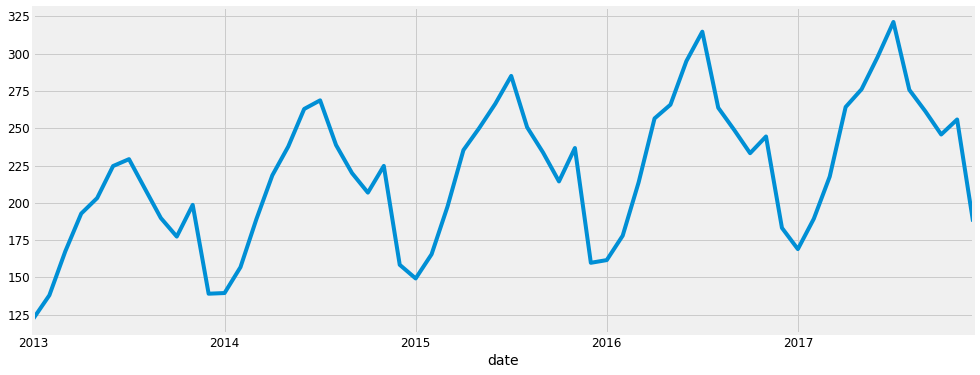

In [13]:
y.plot(figsize=(15, 6))
plt.show()

## Time-series Decomposition

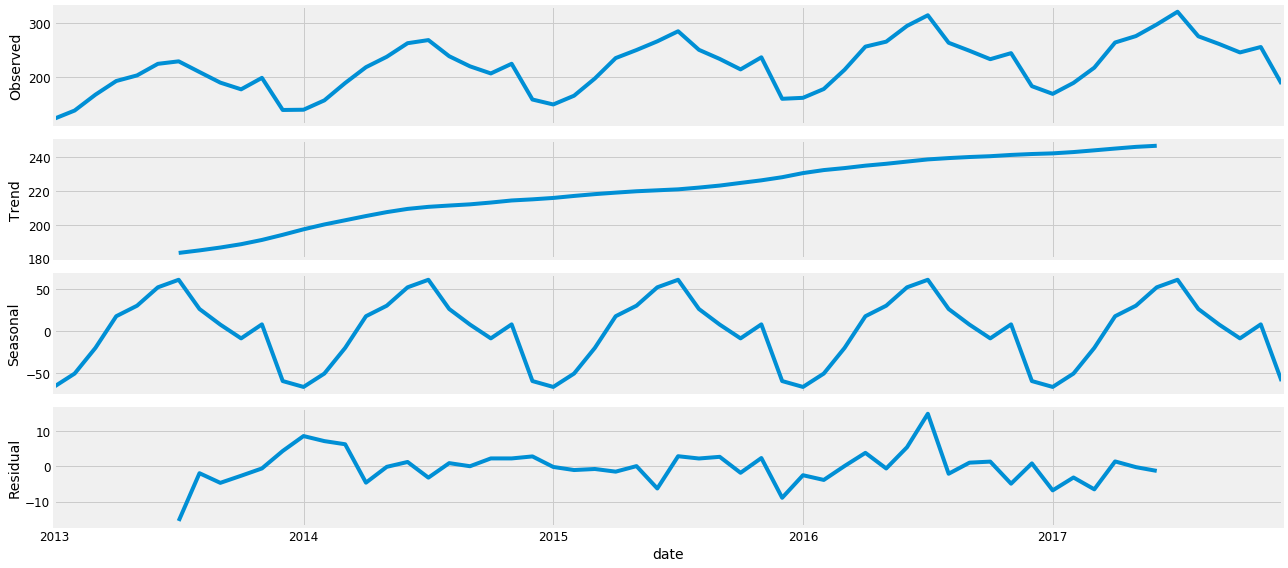

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Parameter Selection

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4])

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)


In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, 
                                            enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                  continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:809.0233091065841
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:612.7661768930927
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:410.1243209357464


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1465.0335056119463
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:362.50804259496334
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:344.44599685643306
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:270.2750575715704


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1468.0281927546118
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:730.5384816708572
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:549.0816617252232
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:367.4640009142322


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1218.731093631115
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:345.56034543312364
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:326.7848867444565
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:264.97272102510016


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1194.0209661380043
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:561.0193779207632
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:416.4786218609692
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:315.352786506843


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1093.3768422177702
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:322.55845949521597
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:313.811416812987
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:241.53019077790051


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1264.8903354022063
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:551.9178248272876
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:408.23478623605644
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:304.72822439526766


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:621.2325449191565
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:315.50721089287725
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:298.8975593608114
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:230.7802365517173
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:772.7074564252882
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:571.8254699147708
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:427.091490605112
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:321.01152352270213


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1293.2796908424991
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:319.11997131371174


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:322.1069448185462
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:242.2190590686939


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1272.1227297658606
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:563.3121962325981


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:421.58085037422927
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:311.4260697429101


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1551.8629072297663
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:315.09177456352944
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:303.95491049330434
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:232.44709711863342


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1547.0090949590278
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:560.9920202095418
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:416.94558671514164
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:310.0453894750653


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:986.6651259203601
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:309.37982558420373
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:303.44086813413185
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:225.73642101517788


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:990.2294028462933
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:553.3498024037333
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:410.159919914555
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:306.06049151912543


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1356.2140062401618
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:310.9796471086732


C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:300.4105952141688
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:226.29063798392036
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1357.7888789706021


In [17]:
# item 1 ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC: 225.74
# item 2 ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:284.9667076467354
# item 3 ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:239.23462894199392
# item 4 ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:211.19508912357793
# item 5 ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:208.16297924426928


In [18]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5465      0.165     -3.311      0.001      -0.870      -0.223
ar.S.L12      -0.3315      0.179     -1.852      0.064      -0.682       0.019
sigma2        37.5231     10.417      3.602      0.000      17.107      57.939


## Validating the Model

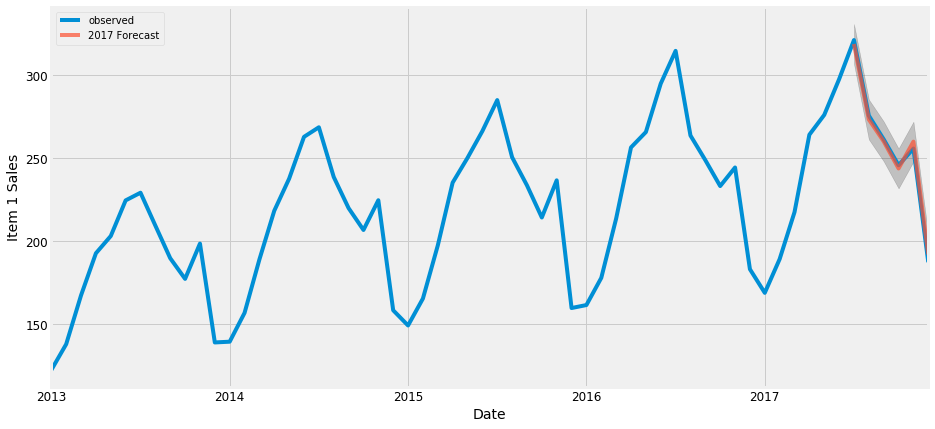

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2017-07-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='2017 Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Item 1 Sales')
plt.legend()
plt.show()

In [20]:
#predict 2017
print(pred_ci)

            lower TotalSales10  upper TotalSales10
date                                              
2017-07-01          306.904829          330.916785
2017-08-01          261.437117          285.449074
2017-09-01          248.203454          272.215411
2017-10-01          231.874837          255.886793
2017-11-01          248.037366          272.049323
2017-12-01          180.012525          204.024481


In [21]:
#pred_ci.to_csv('item1_2017_prediction.csv', index = True)

## Evaluation

In [27]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-07-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 9.17


In [28]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 3.03


In [29]:
rsquare_item1=r2_score(y_forecasted, y_truth)
rsquare_item1

0.9935318634086044

In [30]:
y_forecasted

date
2017-07-01    318.910807
2017-08-01    273.443096
2017-09-01    260.209433
2017-10-01    243.880815
2017-11-01    260.043345
2017-12-01    192.018503
Freq: MS, dtype: float64

In [31]:
y_truth

date
2017-07-01    321.290323
2017-08-01    275.741935
2017-09-01    261.433333
2017-10-01    245.806452
2017-11-01    255.866667
2017-12-01    187.387097
Freq: MS, Name: TotalSales10, dtype: float64